In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [142]:
data = pd.read_csv('winequality-red.csv')

In [143]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [144]:
print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns")

The dataset contains 1599 rows and 12 columns


In [145]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [146]:
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [147]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

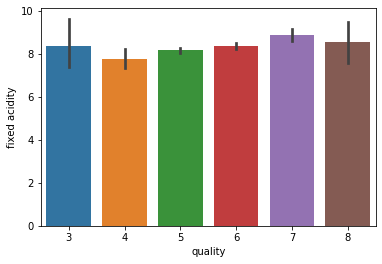

In [162]:
sns.barplot(x = 'quality', y = 'fixed acidity', data = data)

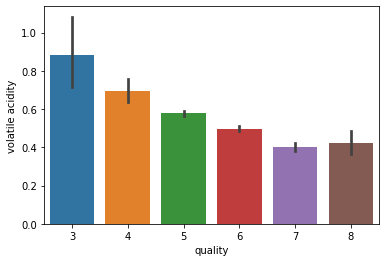

In [163]:
sns.barplot(x = 'quality', y = 'volatile acidity', data = data)

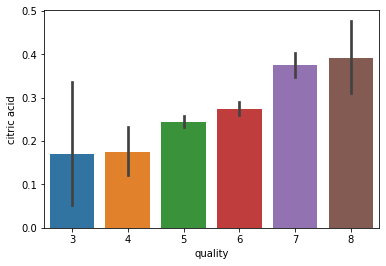

In [164]:
sns.barplot(x = 'quality', y = 'citric acid', data = data)

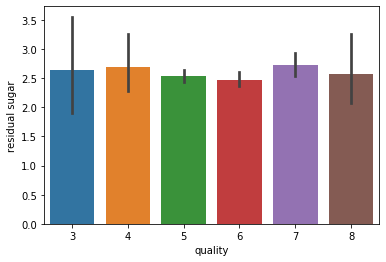

In [165]:
sns.barplot(x = 'quality', y = 'residual sugar', data = data)

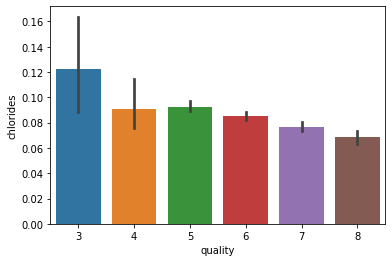

In [166]:
sns.barplot(x = 'quality', y = 'chlorides', data = data)

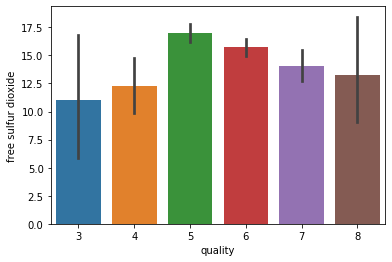

In [167]:
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = data)

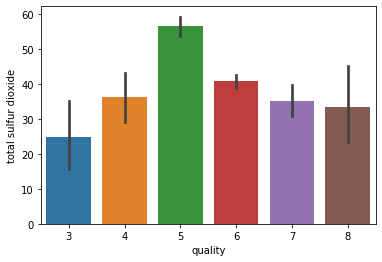

In [168]:
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = data)

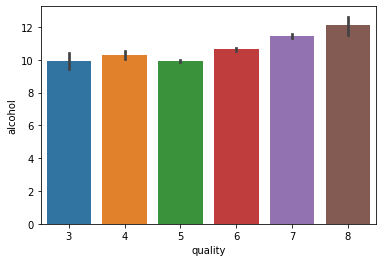

In [169]:
sns.barplot(x = 'quality', y = 'alcohol', data = data)

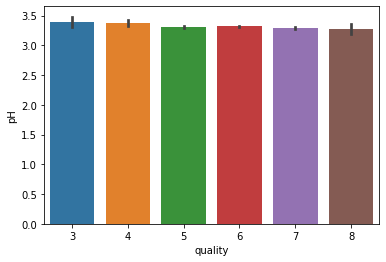

In [170]:
sns.barplot(x = 'quality', y = 'pH', data = data)

In [150]:
x = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].values
y = data['quality'].values

In [151]:
from sklearn.model_selection import train_test_split

In [171]:
x_train, x_test, y_train, y_test = train_test_split(x ,y, test_size = 0.30, random_state = 0)

In [172]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [173]:
from sklearn.tree import DecisionTreeRegressor

In [174]:
reg = DecisionTreeRegressor(random_state = 0)

In [175]:
reg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [176]:
pred_reg = reg.predict(x_test)

In [177]:
from sklearn.metrics import classification_report, confusion_matrix

In [178]:
print(classification_report(y_test, pred_reg))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.06      0.06      0.06        17
           5       0.69      0.65      0.67       195
           6       0.60      0.61      0.60       200
           7       0.42      0.46      0.44        61
           8       0.17      0.17      0.17         6

    accuracy                           0.58       480
   macro avg       0.32      0.32      0.32       480
weighted avg       0.59      0.58      0.58       480



In [179]:
print(confusion_matrix(y_test, pred_reg))

[[  0   0   0   1   0   0]
 [  0   1   6   8   2   0]
 [  3  12 127  44   9   0]
 [  0   3  48 122  24   3]
 [  0   0   4  27  28   2]
 [  0   0   0   2   3   1]]


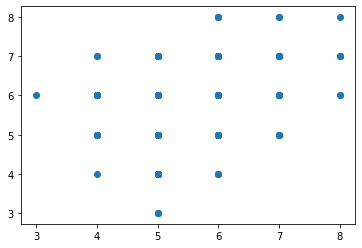

In [180]:
plt.scatter(y_test, pred_reg)